# Preprocessing

Importing libraries and the mxmh dataset

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
mxmh = pd.read_csv(r'C:\\Users\\mavic\\OneDrive\\Desktop\\COOP\\pod project\\mxmh_survey_results.csv')

In [3]:
mxmh.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


Looking into the data shape, type, and nulls

In [4]:
mxmh.shape

(736, 33)

In [5]:
mxmh.dtypes

Timestamp                        object
Age                             float64
Primary streaming service        object
Hours per day                   float64
While working                    object
Instrumentalist                  object
Composer                         object
Fav genre                        object
Exploratory                      object
Foreign languages                object
BPM                             float64
Frequency [Classical]            object
Frequency [Country]              object
Frequency [EDM]                  object
Frequency [Folk]                 object
Frequency [Gospel]               object
Frequency [Hip hop]              object
Frequency [Jazz]                 object
Frequency [K pop]                object
Frequency [Latin]                object
Frequency [Lofi]                 object
Frequency [Metal]                object
Frequency [Pop]                  object
Frequency [R&B]                  object
Frequency [Rap]                  object


In [6]:
mxmh.isna().sum()

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

Dropping the BPM column, replacing 'Music Effects' nulls with 'unknown', and dropping the rest of the nulls

In [7]:
mxmh.drop(columns='BPM', inplace=True)

In [8]:
#Look for nulls
mxmh.isna().sum()

Timestamp                       0
Age                             1
Primary streaming service       1
Hours per day                   0
While working                   3
Instrumentalist                 4
Composer                        1
Fav genre                       0
Exploratory                     0
Foreign languages               4
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia                        0
OCD           

In [9]:
mxmh.fillna({'Music effects': 'Unknown'}, inplace=True)

In [10]:
mxmh.isna().sum()

Timestamp                       0
Age                             1
Primary streaming service       1
Hours per day                   0
While working                   3
Instrumentalist                 4
Composer                        1
Fav genre                       0
Exploratory                     0
Foreign languages               4
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia                        0
OCD           

In [11]:
mxmh.dropna(inplace=True)

In [12]:
#Check to make sure all nulls are removed
mxmh.isna().sum()

Timestamp                       0
Age                             0
Primary streaming service       0
Hours per day                   0
While working                   0
Instrumentalist                 0
Composer                        0
Fav genre                       0
Exploratory                     0
Foreign languages               0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia                        0
OCD           

Identify how much of the data still remained

In [13]:
mxmh.shape

(725, 32)

Take "Frequency" out from each of the genre column names

In [14]:
mxmh=mxmh.rename(columns={"Frequency [Classical]" : "Classical", "Frequency [Country]" : "Country", "Frequency [EDM]" : "EDM", "Frequency [Folk]": "Folk", "Frequency [Gospel]" : "Gospel", "Frequency [Hip hop]" : "Hip hop", "Frequency [Jazz]" : "Jazz", "Frequency [K pop]" : "K pop", "Frequency [Latin]" : "Latin", "Frequency [Lofi]" : "Lofi", "Frequency [Metal]" : "Metal", "Frequency [Pop]" : "Pop", "Frequency [R&B]" : "R&B", "Frequency [Rap]" :"Rap", "Frequency [Rock]" : "Rock", "Frequency [Video game music]" : "Video game music", "Music effects": "Impact"})

Grouping age by binning them then determine how many values are in each bin

In [15]:
def bins(age):
    if age in range(10,20):
        return '10-20'
    if age in range(20,30):
        return '20-30'
    if age in range(30,40):
        return '30-40'
    if age in range(40,50):
        return '40-50'
    if age in range(50,60):
        return '50-60'    
    if age in range(60,70):
        return '60-70'
    if age in range(70,80):
        return '70-80'
    if age in range(80,90):
        return '80-90'    

mxmh['Age(binned)']=mxmh['Age'].apply(bins)

In [16]:
mxmh['Age(binned)'].value_counts()

10-20    294
20-30    274
30-40     80
40-50     29
50-60     21
60-70     20
70-80      5
80-90      2
Name: Age(binned), dtype: int64

Checking the values of each genre and encoding them

In [17]:
print("Values for Classical", mxmh['Classical'].unique())
print("Values for Country", mxmh['Country'].unique())
print("Values for EDM", mxmh['EDM'].unique())
print("Values for Folk", mxmh['Folk'].unique())
print("Values for Gospel", mxmh['Gospel'].unique())
print("Values for Hip hop", mxmh['Hip hop'].unique())
print("Values for Jazz", mxmh['Jazz'].unique())
print("Values for K pop", mxmh['K pop'].unique())
print("Values for Latin", mxmh['Latin'].unique())
print("Values for Lofi", mxmh['Lofi'].unique())
print("Values for Metal", mxmh['Metal'].unique())
print("Values for Pop", mxmh['Pop'].unique())
print("Values for R&B", mxmh['R&B'].unique())
print("Values for Rap", mxmh['Rap'].unique())
print("Values for Rock", mxmh['Rock'].unique())
print("Values for Video game music", mxmh['Video game music'].unique())

Values for Classical ['Rarely' 'Sometimes' 'Never' 'Very frequently']
Values for Country ['Never' 'Sometimes' 'Very frequently' 'Rarely']
Values for EDM ['Rarely' 'Never' 'Very frequently' 'Sometimes']
Values for Folk ['Never' 'Rarely' 'Sometimes' 'Very frequently']
Values for Gospel ['Never' 'Sometimes' 'Rarely' 'Very frequently']
Values for Hip hop ['Sometimes' 'Rarely' 'Never' 'Very frequently']
Values for Jazz ['Never' 'Very frequently' 'Rarely' 'Sometimes']
Values for K pop ['Very frequently' 'Rarely' 'Sometimes' 'Never']
Values for Latin ['Very frequently' 'Sometimes' 'Never' 'Rarely']
Values for Lofi ['Rarely' 'Sometimes' 'Very frequently' 'Never']
Values for Metal ['Never' 'Sometimes' 'Rarely' 'Very frequently']
Values for Pop ['Very frequently' 'Sometimes' 'Rarely' 'Never']
Values for R&B ['Sometimes' 'Never' 'Very frequently' 'Rarely']
Values for Rap ['Very frequently' 'Rarely' 'Never' 'Sometimes']
Values for Rock ['Never' 'Very frequently' 'Rarely' 'Sometimes']
Values for Vi

In [18]:
import sklearn
from sklearn.preprocessing import OrdinalEncoder

oe=OrdinalEncoder(categories=[['Never', 'Rarely', 'Sometimes', 'Very frequently']])

mxmh['Classical']=oe.fit_transform(mxmh['Classical'].values.reshape(-1,1))
mxmh['Country']=oe.fit_transform(mxmh['Country'].values.reshape(-1,1))
mxmh['EDM']=oe.fit_transform(mxmh['EDM'].values.reshape(-1,1))
mxmh['Folk']=oe.fit_transform(mxmh['Folk'].values.reshape(-1,1))
mxmh['Gospel']=oe.fit_transform(mxmh['Gospel'].values.reshape(-1,1))
mxmh['Hip hop']=oe.fit_transform(mxmh['Hip hop'].values.reshape(-1,1))
mxmh['Jazz']=oe.fit_transform(mxmh['Jazz'].values.reshape(-1,1))
mxmh['K pop']=oe.fit_transform(mxmh['K pop'].values.reshape(-1,1))
mxmh['Latin']=oe.fit_transform(mxmh['Latin'].values.reshape(-1,1))
mxmh['Lofi']=oe.fit_transform(mxmh['Lofi'].values.reshape(-1,1))
mxmh['Metal']=oe.fit_transform(mxmh['Metal'].values.reshape(-1,1))
mxmh['Pop']=oe.fit_transform(mxmh['Pop'].values.reshape(-1,1))
mxmh['R&B']=oe.fit_transform(mxmh['R&B'].values.reshape(-1,1))
mxmh['Rap']=oe.fit_transform(mxmh['Rap'].values.reshape(-1,1))
mxmh['Rock']=oe.fit_transform(mxmh['Rock'].values.reshape(-1,1))
mxmh['Video game music']=oe.fit_transform(mxmh['Video game music'].values.reshape(-1,1))
mxmh.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Rap,Rock,Video game music,Anxiety,Depression,Insomnia,OCD,Impact,Permissions,Age(binned)
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,3.0,0.0,2.0,3.0,0.0,1.0,0.0,Unknown,I understand.,10-20
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,1.0,3.0,1.0,7.0,2.0,2.0,1.0,Unknown,I understand.,60-70
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,1.0,1.0,3.0,7.0,7.0,10.0,2.0,No effect,I understand.,10-20
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,0.0,0.0,0.0,9.0,7.0,3.0,3.0,Improve,I understand.,60-70
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,3.0,0.0,1.0,7.0,2.0,5.0,9.0,Improve,I understand.,10-20


# Visuals using matplotlib

A graph on the count of responders listening to each music genre per frequency

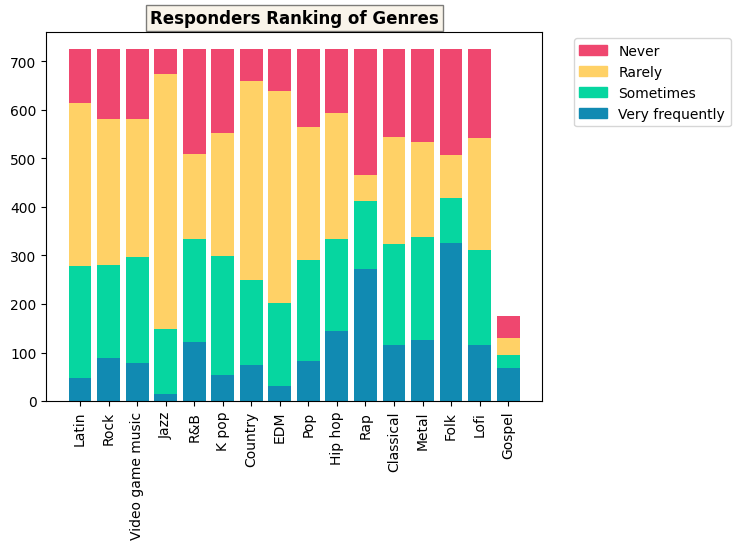

In [25]:
import matplotlib.patches as mpatches

i = 11

r_dist = []
s_dist = []
n_dist = []
vf_dist = []

while i != 27:
    freq_dist = mxmh.iloc[:, i].value_counts().sort_index(ascending=True).tolist()
    r_dist.append(freq_dist[0])
    s_dist.append(freq_dist[1])
    n_dist.append(freq_dist[2])
    vf_dist.append(freq_dist[3])  
    
    i+=1

fig, ax = plt.subplots()

for i in range (0, 16):
    ax.bar(i, r_dist[i], label='Rare', bottom = vf_dist[i] + s_dist[i], color = '#FFD166')
    ax.bar(i, s_dist[i], label='Sometimes', bottom = vf_dist[i], color = '#06D6A0')
    ax.bar(i, n_dist[i], label='Never', bottom=vf_dist[i] + s_dist[i] + r_dist[i], color = '#EF476F')
    ax.bar(i, vf_dist[i], label='Very frequently', color = '#118AB2')

bbox = {'facecolor': '#f5ead7', 'alpha': 0.5, 'pad': 3}
ax.set_title('Responders Ranking of Genres', bbox=bbox, fontweight='bold')
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
ax.set_xticklabels(mxmh['Fav genre'].unique())
plt.xticks(rotation=90)

patch1 = mpatches.Patch(color='#EF476F', label='Never')
patch2 = mpatches.Patch(color='#FFD166', label='Rarely')
patch3 = mpatches.Patch(color='#06D6A0', label='Sometimes')
patch4 = mpatches.Patch(color='#118AB2', label='Very frequently')

plt.legend(handles=[patch1, patch2, patch3, patch4], bbox_to_anchor=(1.05, 1.0), loc='upper left')

A function that graphs the comparison of mental health conditions with the frequency of listening to the genres

In [20]:
import itertools

med_list = []
med_list2 = []
med_list3 = []
med_list4 = []

#mxmh.replace(['Never', 'Rarely', 'Sometimes', 'Very frequently'],
                        #[0, 1, 2, 3], inplace=True)


for i in range (10, 26):
    freq_genre = mxmh.columns[i]
    med_list.append(pd.pivot_table(mxmh, values='Anxiety', index=freq_genre, aggfunc="median").values.tolist())
    med_list2.append(pd.pivot_table(mxmh, values='Depression', index=freq_genre, aggfunc="median").values.tolist())
    med_list3.append(pd.pivot_table(mxmh, values='Insomnia', index=freq_genre, aggfunc="median").values.tolist())
    med_list4.append(pd.pivot_table(mxmh, values='OCD', index=freq_genre, aggfunc="median").values.tolist())


def m_vs_gfreq(mlist, fig_name, bd1, bd2):

    r_dist = []
    s_dist = []
    n_dist = []
    vf_dist = []

    for i in range (0, 16):
        n_dist.append(mlist[i][0])
        r_dist.append(mlist[i][1])  
        s_dist.append(mlist[i][2])  
        vf_dist.append(mlist[i][3])  

    labels = mxmh['Fav genre'].unique()
    x = np.arange(len(labels))
    width = 0.18

    fig, ax = plt.subplots(figsize=(6, 6))

    b1 = ax.barh(y= x-2*width, width= list(itertools.chain(*n_dist)), height= width, label="Never", color = '#EF476F')
    b2 = ax.barh(y= x-width, width= list(itertools.chain(*r_dist)), height= width, label="Rarely", color = '#FFD166')
    b3 = ax.barh(y= x, width= list(itertools.chain(*s_dist)), height= width, label="Sometimes", color = '#06D6A0')
    b4 = ax.barh(y= x+width, width= list(itertools.chain(*vf_dist)), height= width, label="Very Frequently", color = '#118AB2')


    #ax.set_ylim(bd1, bd2)
    #ax.set_xlabel(labels)
    bbox = {'facecolor': '#f5ead7', 'alpha': 0.5, 'pad': 3}
    ax.set_title(fig_name, bbox=bbox, fontweight='bold')
    ax.set_yticks(x, labels)
    ax.legend(loc='best')

    #plt.ylabel('Genre')
    plt.xlabel(input())
    plt.yticks (rotation = 'horizontal')
    plt.show()

Graphs comparing each of the four mental health conditions with the frequency of genres

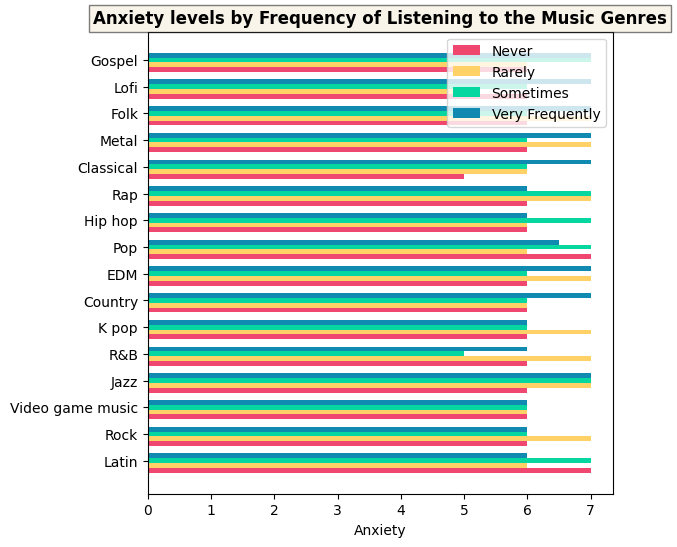

In [21]:
m_vs_gfreq(med_list, 'Anxiety levels by Frequency of Listening to the Music Genres', 9, 4)

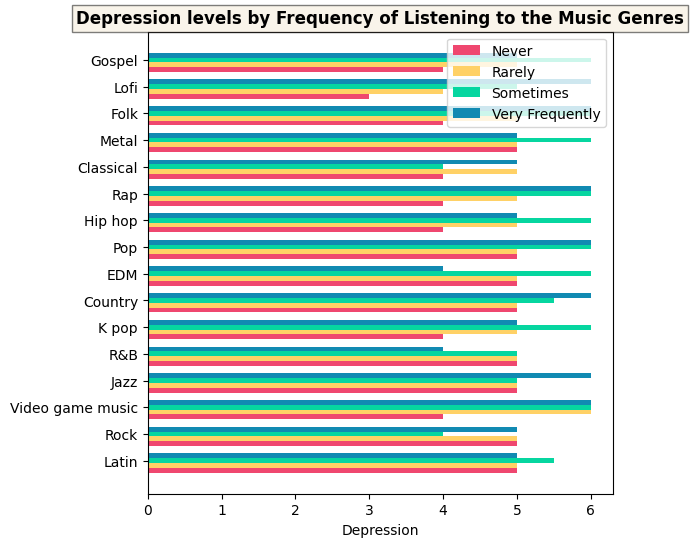

In [22]:
m_vs_gfreq(med_list2, 'Depression levels by Frequency of Listening to the Music Genres', 2, 8.5)

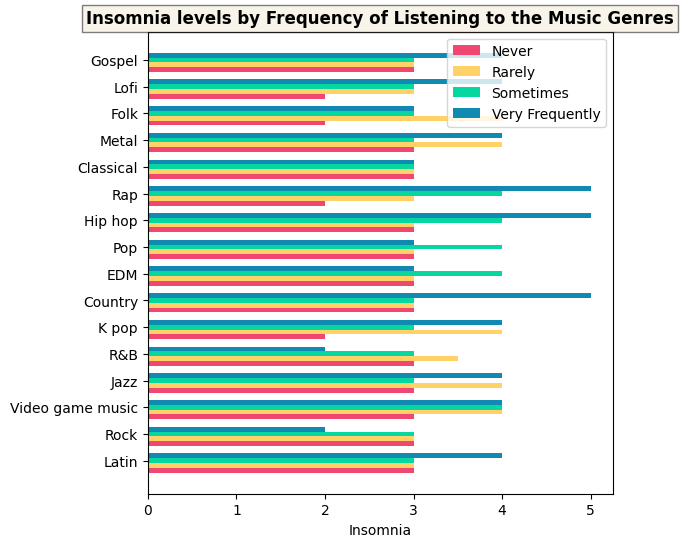

In [23]:
m_vs_gfreq(med_list3, 'Insomnia levels by Frequency of Listening to the Music Genres', 0, 6.5)

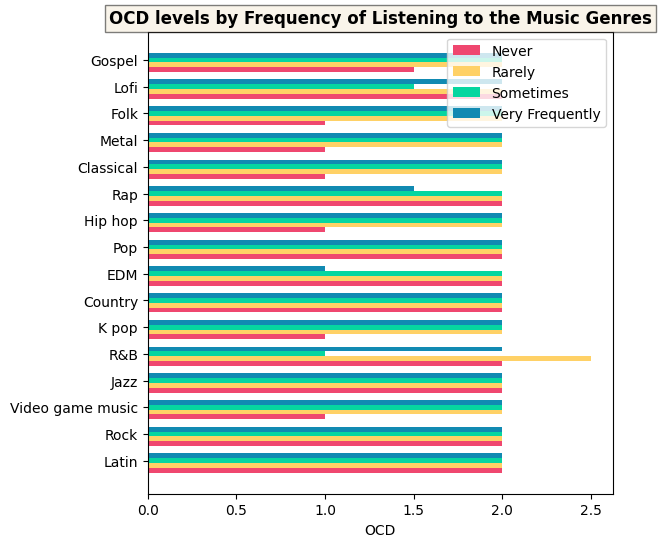

In [24]:
m_vs_gfreq(med_list4, 'OCD levels by Frequency of Listening to the Music Genres', 0,4)